# Queries

We will use the design produced in [004-Design](./004-Design.ipynb). Please execute that notebook first to define and populate the `app` schema.

## Recall the design

The following code connects to the `app` schema and generates Python classes to access its classes.

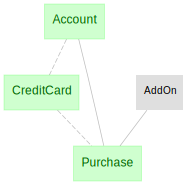

In [4]:
import datajoint as dj
schema = dj.Schema('app')
schema.spawn_missing_classes()
dj.Diagram(schema)

In [5]:
Purchase()

phone,addon_id,card_number
57739576919,1,60400630491
13185990415,2,60400744029
95867190471,1,60402177269
74932324173,1,60404678041
74932324173,2,60404678041
74932324173,3,60404678041
54717139763,3,60405261136
66966252830,1,60406800650
35067438860,1,60410940211
50651554632,1,60413723457


# Queries

## Simple queries

In [6]:
Account()

phone,first_name,last_name,dob,sex
10019062770,Lauren,Snyder,1961-08-18,F
10020965828,Victor,Ross,1952-07-12,M
10040756087,Susan,Brown,1992-12-14,F
10047410808,Paige,Holder,1942-09-02,F
10051015428,William,Estrada,1985-12-31,M
10068079952,Natalie,Brown,1950-09-09,F
10092122352,Harold,Rivera,2011-10-19,M
10103783887,Jordan,Gilbert,2003-03-16,M
10104072787,Sharon,Shaw,1926-05-13,F
10116699599,Alec,Smith,1958-07-31,M


In [7]:
Account.fetch(as_dict=True, limit=5)

[{'phone': 10019062770,
  'first_name': 'Lauren',
  'last_name': 'Snyder',
  'dob': datetime.date(1961, 8, 18),
  'sex': 'F'},
 {'phone': 10020965828,
  'first_name': 'Victor',
  'last_name': 'Ross',
  'dob': datetime.date(1952, 7, 12),
  'sex': 'M'},
 {'phone': 10040756087,
  'first_name': 'Susan',
  'last_name': 'Brown',
  'dob': datetime.date(1992, 12, 14),
  'sex': 'F'},
 {'phone': 10047410808,
  'first_name': 'Paige',
  'last_name': 'Holder',
  'dob': datetime.date(1942, 9, 2),
  'sex': 'F'},
 {'phone': 10051015428,
  'first_name': 'William',
  'last_name': 'Estrada',
  'dob': datetime.date(1985, 12, 31),
  'sex': 'M'}]

In [8]:
Account.fetch(as_dict=True, order_by=('last_name', 'first_name'), limit=5)

[{'phone': 15366336995,
  'first_name': 'Rachel',
  'last_name': 'Abbott',
  'dob': datetime.date(2000, 4, 22),
  'sex': 'F'},
 {'phone': 91972525114,
  'first_name': 'Robert',
  'last_name': 'Abbott',
  'dob': datetime.date(1929, 1, 19),
  'sex': 'M'},
 {'phone': 36893728519,
  'first_name': 'William',
  'last_name': 'Abbott',
  'dob': datetime.date(2003, 6, 22),
  'sex': 'M'},
 {'phone': 51992023735,
  'first_name': 'Brianna',
  'last_name': 'Acevedo',
  'dob': datetime.date(1982, 4, 2),
  'sex': 'F'},
 {'phone': 38801647559,
  'first_name': 'Christian',
  'last_name': 'Acevedo',
  'dob': datetime.date(1940, 4, 10),
  'sex': 'M'}]

In [9]:
Account.fetch(as_dict=True, order_by=('dob DESC'), limit=5, offset=100)

[{'phone': 61348693087,
  'first_name': 'Jennifer',
  'last_name': 'Singh',
  'dob': datetime.date(2022, 8, 6),
  'sex': 'F'},
 {'phone': 40205369474,
  'first_name': 'Alexander',
  'last_name': 'Thomas',
  'dob': datetime.date(2022, 8, 6),
  'sex': 'M'},
 {'phone': 47397056664,
  'first_name': 'Garrett',
  'last_name': 'Mooney',
  'dob': datetime.date(2022, 7, 27),
  'sex': 'M'},
 {'phone': 72207025461,
  'first_name': 'Rhonda',
  'last_name': 'Bates',
  'dob': datetime.date(2022, 7, 21),
  'sex': 'F'},
 {'phone': 85504732206,
  'first_name': 'Desiree',
  'last_name': 'Perez',
  'dob': datetime.date(2022, 7, 20),
  'sex': 'F'}]

## Restriction (selecting rows)
In SQL, this is the `WHERE` clause. In DataJoint, we use operators `&` and `-`.

In [10]:
Account() & {'phone': 69235537483}

phone,first_name,last_name,dob,sex


In [11]:
Account() & {'first_name': 'Michael'}

phone,first_name,last_name,dob,sex
10923785986,Michael,Soto,1945-08-13,M
11005781260,Michael,Washington,1930-08-21,M
11505392467,Michael,Russo,1969-04-05,M
11605501506,Michael,Lopez,1927-02-09,M
11842665345,Michael,Wright,1950-02-04,M
13730659059,Michael,Murphy,None,
14362797615,Michael,Johnson,1918-12-16,M
14419578436,Michael,Fox,2016-08-02,M
14443705983,Michael,Jones,2021-12-07,M
14470747853,Michael,Gibson,1929-11-08,M


In [12]:
Account & 'first_name="Michael"'

phone,first_name,last_name,dob,sex
10923785986,Michael,Soto,1945-08-13,M
11005781260,Michael,Washington,1930-08-21,M
11505392467,Michael,Russo,1969-04-05,M
11605501506,Michael,Lopez,1927-02-09,M
11842665345,Michael,Wright,1950-02-04,M
13730659059,Michael,Murphy,None,
14362797615,Michael,Johnson,1918-12-16,M
14419578436,Michael,Fox,2016-08-02,M
14443705983,Michael,Jones,2021-12-07,M
14470747853,Michael,Gibson,1929-11-08,M


In [13]:
Account & 'first_name="Anne"' & 'dob > "2001-01-01"'

phone,first_name,last_name,dob,sex
18775649461,Anne,Lozano,2018-10-25,F
21157989480,Anne,Spencer,2004-10-23,F
34561118573,Anne,Wilson,2010-12-31,F
50673081066,Anne,Munoz,2014-01-07,F
62663220810,Anne,Williams,2007-06-20,F


In [14]:
Account & 'DATEDIFF(now(), dob) < 300'

phone,first_name,last_name,dob,sex
10306464131,Zachary,Vaughan,2023-06-04,M
11472981791,Kristin,Ward,2023-06-14,F
14249470562,John,Contreras,2023-03-05,M
14900154875,Daniel,Perry,2023-04-08,M
15775138364,Eric,Colon,2023-04-30,M
18206197063,Erin,Mendoza,2023-07-18,F
19118508049,Rebekah,Hardin,2023-01-25,F
20022976140,Shawn,Torres,2023-09-14,M
20280673168,Rebecca,Ford,2023-02-28,F
21265760789,Steven,Webster,2023-03-11,M


In [15]:
Account - 'DATEDIFF(now(), dob) < 300'

phone,first_name,last_name,dob,sex
10019062770,Lauren,Snyder,1961-08-18,F
10020965828,Victor,Ross,1952-07-12,M
10040756087,Susan,Brown,1992-12-14,F
10047410808,Paige,Holder,1942-09-02,F
10051015428,William,Estrada,1985-12-31,M
10068079952,Natalie,Brown,1950-09-09,F
10092122352,Harold,Rivera,2011-10-19,M
10103783887,Jordan,Gilbert,2003-03-16,M
10104072787,Sharon,Shaw,1926-05-13,F
10116699599,Alec,Smith,1958-07-31,M


In [16]:
millennials = Account & 'dob > "1978-01-01"' & 'dob < "1997-01-01"'

In [17]:
millennials & 'first_name="Michael"'

phone,first_name,last_name,dob,sex
15523841597,Michael,Lane,1978-10-30,M
17473604755,Michael,Garcia,1988-01-04,M
17839832842,Michael,Novak,1982-12-13,M
19103518385,Michael,Lee,1988-05-13,M
21002247444,Michael,Owens,1989-09-13,M
21096585246,Michael,Jones,1980-09-28,M
23404263421,Michael,Kramer,1990-01-02,M
29638831412,Michael,Atkins,1981-08-09,M
30870173313,Michael,Gomez,1993-08-22,M
31813197078,Michael,Martinez,1990-06-27,M


In [18]:
millennials = Account & 'dob BETWEEN "1978-01-01" AND "1997-01-01"'

In [19]:
millennials

phone,first_name,last_name,dob,sex
10040756087,Susan,Brown,1992-12-14,F
10051015428,William,Estrada,1985-12-31,M
10126431571,Jessica,Hayes,1983-05-29,F
10170646196,Anthony,Camacho,1992-10-11,M
10177712986,Mario,Lewis,1996-06-14,M
10187345213,Danny,Ellis,1993-10-07,M
10324766437,Karen,Daniels,1996-09-04,F
10358655985,Christina,Miller,1978-10-05,F
10430100835,Maurice,Leach,1978-06-10,M
10545086383,Alexis,Williams,1980-08-07,F


# Projection (selecting, calculating, and renaming columns)

In [20]:
Account()

phone,first_name,last_name,dob,sex
10019062770,Lauren,Snyder,1961-08-18,F
10020965828,Victor,Ross,1952-07-12,M
10040756087,Susan,Brown,1992-12-14,F
10047410808,Paige,Holder,1942-09-02,F
10051015428,William,Estrada,1985-12-31,M
10068079952,Natalie,Brown,1950-09-09,F
10092122352,Harold,Rivera,2011-10-19,M
10103783887,Jordan,Gilbert,2003-03-16,M
10104072787,Sharon,Shaw,1926-05-13,F
10116699599,Alec,Smith,1958-07-31,M


In [21]:
Account.proj()

phone
10019062770
10020965828
10040756087
10047410808
10051015428
10068079952
10092122352
10103783887
10104072787
10116699599


In [22]:
Account.proj('last_name')

phone,last_name
10019062770,Snyder
10020965828,Ross
10040756087,Brown
10047410808,Holder
10051015428,Estrada
10068079952,Brown
10092122352,Rivera
10103783887,Gilbert
10104072787,Shaw
10116699599,Smith


In [23]:
Account.proj(..., '-dob')

phone,first_name,last_name,sex
10019062770,Lauren,Snyder,F
10020965828,Victor,Ross,M
10040756087,Susan,Brown,F
10047410808,Paige,Holder,F
10051015428,William,Estrada,M
10068079952,Natalie,Brown,F
10092122352,Harold,Rivera,M
10103783887,Jordan,Gilbert,M
10104072787,Sharon,Shaw,F
10116699599,Alec,Smith,M


In [ ]:
full_name = Account.proj(full_name='concat(last_name, ", ", first_name)')

In [ ]:
d = full_name.fetch(order_by="full_name", format="frame")

In [52]:
d

,full_name
phone,
51444261372,"Abbott, Alexis"
71380323330,"Abbott, Emily"
53177609092,"Abbott, Gregory"
66079291453,"Abbott, Stephen"
27358861634,"Acevedo, Brandon"
...,...
67805643956,"Zuniga, Chris"
73169559080,"Zuniga, Erica"
20170335500,"Zuniga, Rachel"


In [59]:
accounts = Account.proj('last_name', age="floor(datediff(now(), dob)/365.25)")

In [60]:
accounts & 'age > 35'

phone,last_name,age calculated attribute
10012512171,Henderson,102
10017661220,Anderson,68
10037061898,Foley,94
10068182298,Clark,37
10070173668,Duffy,54
10070547405,Pratt,37
10079669194,Johnson,45
10099464091,Smith,74
10102995813,Young,99
10116323806,Hernandez,92


In [64]:
accounts & 'age between 35 and 45'

phone,last_name,age calculated attribute
10068182298,Clark,37
10070547405,Pratt,37
10079669194,Johnson,45
10219719840,Roberts,43
10229438507,Coleman,38
10291521740,Davis,40
10337689941,Richardson,44
10460216558,Smith,41
11089394344,Sparks,41
11157317272,Ruiz,37


In [70]:
Account().proj(..., id='phone', name='(first_name)')

id,first_name,name,last_name,dob
10008004398,Thomas,Thomas,Li,2009-05-22
10010213238,Stacey,Stacey,Mitchell,2015-10-02
10012512171,James,James,Henderson,1920-10-09
10017661220,Donald,Donald,Anderson,1955-04-16
10025696662,James,James,Small,2016-12-29
10037061898,Deborah,Deborah,Foley,1929-02-06
10046294691,Gwendolyn,Gwendolyn,Turner,2020-12-19
10046839321,Marcia,Marcia,Martinez,1990-07-15
10068182298,Victor,Victor,Clark,1986-09-13
10070173668,Ronald,Ronald,Duffy,1969-03-23


In [72]:
(Account & 'last_name > "S"').proj()

phone
10025696662
10046294691
10099464091
10102995813
10152397506
10206755444
10358819974
10405413361
10422669197
10433061621


# Restrictions by a query
In SQL, this is a query where the `WHERE` clause includes another `SELECT`` clause.

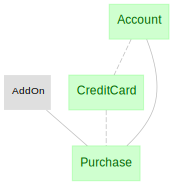

In [74]:
dj.Diagram(schema)

In [76]:
Account & CreditCard

phone,first_name,last_name,dob
10012512171,James,Henderson,1920-10-09
10017661220,Donald,Anderson,1955-04-16
10037061898,Deborah,Foley,1929-02-06
10046294691,Gwendolyn,Turner,2020-12-19
10046839321,Marcia,Martinez,1990-07-15
10079669194,Ryan,Johnson,1978-03-08
10099464091,Matthew,Smith,1949-05-04
10102995813,David,Young,1923-12-29
10116323806,Scott,Hernandez,1930-11-01
10120727834,Robert,Rodriguez,1951-04-10


In [77]:
Account - CreditCard

phone,first_name,last_name,dob
10008004398,Thomas,Li,2009-05-22
10010213238,Stacey,Mitchell,2015-10-02
10025696662,James,Small,2016-12-29
10068182298,Victor,Clark,1986-09-13
10070173668,Ronald,Duffy,1969-03-23
10070547405,Leah,Pratt,1986-06-06
10092945283,Deanna,Hayes,2015-08-16
10095918854,Raymond,Adams,2018-05-22
10127762503,Tracy,Mack,1970-04-14
10152397506,James,Wade,1963-04-15


In [83]:
# All the people that purchased AddOn #2.
Account & (Purchase & 'addon_id=2')

phone,first_name,last_name,dob
10153686421,Aaron,Bradley,1912-02-04
10291521740,Melissa,Davis,1983-04-26
10451478023,Diane,Davis,1919-12-31
10496786948,Andrew,Carter,2001-05-02
10734349722,Kenneth,Graves,1932-10-16
10782010443,Amber,Walters,1933-02-12
10844022864,Gary,Rogers,1927-04-10
10862836412,Randy,Sanchez,2018-09-21
11194304584,Matthew,Lucas,2003-03-25
11221407194,Justin,Nelson,1953-04-11


In [88]:
# Give me all accounts who have purchased both Addon 2 and 3
Account & (Purchase & 'addon_id=2') & (Purchase & 'addon_id=3')

phone,first_name,last_name,dob
10496786948,Andrew,Carter,2001-05-02
11883734808,Philip,Black,2014-01-10
12328381833,Louis,Davis,1946-10-09
12966892803,Kathryn,Norman,1913-02-27
15503931605,Robert,Adams,1921-06-04
16065195696,Mathew,Johnson,1981-11-10
16266465922,Mary,Mcpherson,2003-11-23
17386440647,Caleb,Roth,1953-04-11
18690145667,Caleb,Parks,2012-04-18
19361732502,Rodney,Wise,1934-08-11


In [90]:
# Give me all accounts who have purchased Addon 2 or 3
Account & (Purchase & 'addon_id=2 OR addon_id=3')
Account & (Purchase & 'addon_id in (2, 3)')
Account & (Purchase & ['addon_id=3', 'addon_id=2'])

phone,first_name,last_name,dob
10153686421,Aaron,Bradley,1912-02-04
10166849316,Benjamin,Gomez,1929-04-24
10291521740,Melissa,Davis,1983-04-26
10303625356,Rebecca,Griffith,1975-01-10
10451478023,Diane,Davis,1919-12-31
10496786948,Andrew,Carter,2001-05-02
10535081800,John,Mcmahon,1929-01-30
10661381021,Kenneth,Shaffer,1946-09-07
10722472340,Heidi,Callahan,1932-01-05
10734349722,Kenneth,Graves,1932-10-16


In [86]:
# Give me all accounts who have purchased Addon 2 but not 3

In [92]:
# Accounts with credit cards that have no purchases
Account & (CreditCard - Purchase)

phone,first_name,last_name,dob
10012512171,James,Henderson,1920-10-09
10017661220,Donald,Anderson,1955-04-16
10037061898,Deborah,Foley,1929-02-06
10046294691,Gwendolyn,Turner,2020-12-19
10046839321,Marcia,Martinez,1990-07-15
10079669194,Ryan,Johnson,1978-03-08
10099464091,Matthew,Smith,1949-05-04
10102995813,David,Young,1923-12-29
10116323806,Scott,Hernandez,1930-11-01
10120727834,Robert,Rodriguez,1951-04-10


In [96]:
# Accounts with credit cards but no purchases
(Account & CreditCard) - Purchase

phone,first_name,last_name,dob
10012512171,James,Henderson,1920-10-09
10017661220,Donald,Anderson,1955-04-16
10037061898,Deborah,Foley,1929-02-06
10046294691,Gwendolyn,Turner,2020-12-19
10046839321,Marcia,Martinez,1990-07-15
10079669194,Ryan,Johnson,1978-03-08
10099464091,Matthew,Smith,1949-05-04
10102995813,David,Young,1923-12-29
10116323806,Scott,Hernandez,1930-11-01
10120727834,Robert,Rodriguez,1951-04-10


## DeMorgan's Laws

In [3]:
not (A or B) == not A and not B

not (A and B) == not A or not B

not (A and not B) == not A or B

SyntaxError: invalid syntax (1792059247.py, line 1)